12.6 Average path length Albert–Barabási preferential-growth graphs

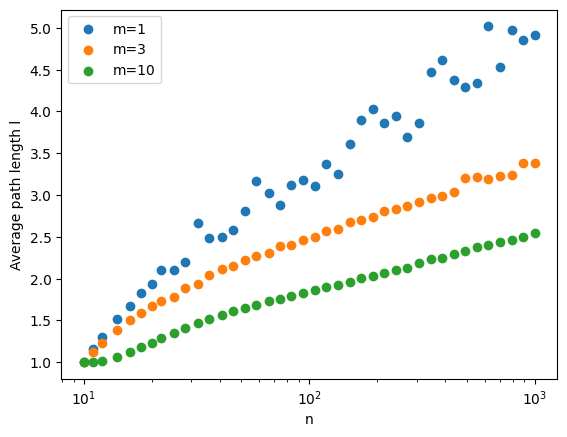

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

n0=10
# n=1000
n_list = np.logspace(1,3,40, dtype=int)

m_list=[1,3,10]
r=100


amatrix= np.ones((n0,n0))
np.fill_diagonal(amatrix, 0)

def find_degree (matrix):
    degree= np.zeros((len(matrix),1))
    for i in range(len(matrix)):
        degree[i,:] = np.sum(matrix[i,:])
    total_degree = np.sum(degree)
    cumulative_sum = np.cumsum(degree)
    prob = cumulative_sum/total_degree
    return (prob)
def compute_average_path_l (a):
    length =0
    for i in range(n):
        for j in range(n):
            if i!=j:
                length+= a[i][j]
    length= length/(n**2-n)
    return length

def check_for_off_diagonal_terms1(a):
    n = len(a)  
    for i in range(n):
        for j in range(n):
            if i != j and a[i][j] == -1:
                return True 
    return False
for m in m_list:
    average_length_list=[]
    for n in n_list:
        amatrix= np.ones((n0,n0))
        np.fill_diagonal(amatrix, 0)
        for i in range(1,n-n0+1):
            new_matrix = np.zeros((n0+i, n0+i))
            new_matrix[:-1,:-1] = amatrix
            new_edge =0
            previous_list=[]
            while new_edge<m:
                prob = find_degree(amatrix)
                random_number = np.random.uniform(0,1)
                for a in range(len(prob)):
                    if prob[a]>=random_number and a not in previous_list:

                        new_matrix[n0+i-1][a]=1
                        new_matrix[a][n0+i-1]=1
                        new_edge+=1
                        previous_list.append(a)
                        break

            amatrix = new_matrix
        l = np.full((n,n),-1)
        t=1               
        int_a = amatrix

        while check_for_off_diagonal_terms1(l):
            for i in range(n):
                for j in range(i+1,n):
                    if amatrix[i,j]!=0:
                        if l[i,j]==l[j,i]==-1:
                            l[i,j]=t
                            l[j,i]=t

                
            amatrix=np.dot(amatrix,int_a)
            t+=1

        average_length_list.append(compute_average_path_l(l))

    plt.scatter(n_list, average_length_list, label=f'm={m}')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('Average path length l')
plt.legend()
plt.show()


# print(amatrix)

# print(compute_average_path_l)

12.6.b Clustering co efficient for Albert–Barabási graphs

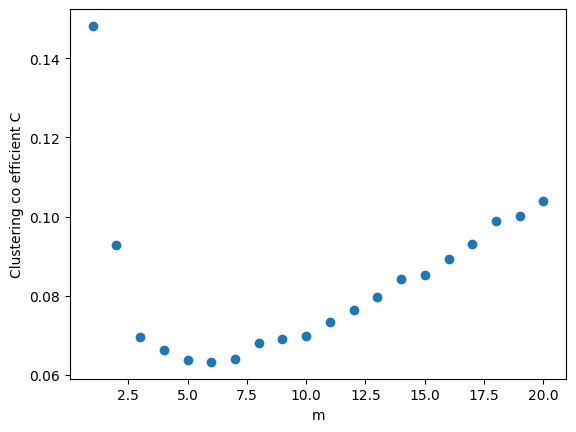

In [4]:
n0=20
m_values = np.arange(1, 21)
n =1000
c_list=[]
def calculate_clustering_coefficient(adjacency_matrix):
    n = len(adjacency_matrix)

    a_cube = np.matmul(np.matmul(adjacency_matrix, adjacency_matrix), adjacency_matrix)
    closed_triangles = np.trace(a_cube)

    degrees = np.sum(adjacency_matrix, axis=0)

    all_triangles = np.sum(np.square(degrees) - degrees)

    clustering_coefficient = closed_triangles / all_triangles if all_triangles > 0 else 0.0

    return clustering_coefficient

for m in m_values:
    # print(m)
    amatrix= np.ones((n0,n0))
    np.fill_diagonal(amatrix, 0)
    for i in range(1,n-n0+1):
        new_matrix = np.zeros((n0+i, n0+i))
        new_matrix[:-1,:-1] = amatrix
        new_edge =0
        previous_list=[]
        while new_edge<m:
            prob = find_degree(amatrix)
            random_number = np.random.uniform(0,1)
            for a in range(len(prob)):
                if prob[a]>=random_number and a not in previous_list:

                    new_matrix[n0+i-1][a]=1
                    new_matrix[a][n0+i-1]=1
                    new_edge+=1
                    previous_list.append(a)
                    break

        amatrix = new_matrix
    c_list.append(calculate_clustering_coefficient(amatrix))

plt.scatter(m_values, c_list)
plt.xlabel('m')
plt.ylabel('Clustering co efficient C')
plt.show()

# print(amatrix)